loading checkpoint from ../models_test/bvae_test_state.tp
loading model...
parameterize optimizer...
loading done


/home/bing/anaconda3/envs/py36/lib/python3.6/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'asr.bvae.bVAE' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/bing/git/asr/asr/bvae.py:182: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(out)


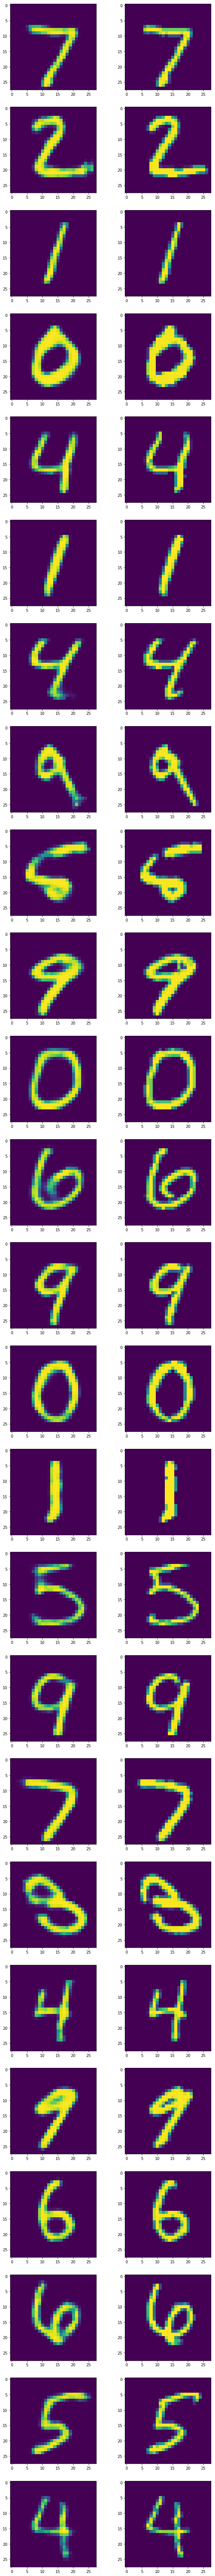

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np

from asr.bvae import bVAE, ConvEncoder, ConvDecoder
from asr.util import save_model, load_model

from torchvision.datasets import MNIST

model = load_model('../models_test','bvae_test')

#loading MNIST
root_dir = '../data/test'
test = MNIST(root=root_dir, download=True, train=False)
# num_train_samples = len(train)
x_test, y_test = test.test_data, test.test_labels
x_test = np.expand_dims(x_test, 1) / 255

num_predictions = 25
predictions = model.predict(x_test[:num_predictions])
def do_plot(x_test, pred, npred):
    rows, cols = npred, 2
    f = plt.figure(figsize=(10, 125))
    for i in range(rows*cols):
        f.add_subplot(rows, cols, i+1)
        if i % 2 == 0:
            img = pred[int(i/2)][0, :, :]
        else:
            img = x_test[int(i/2)][0, :, :]
        plt.imshow(img)
    plt.show()
do_plot(x_test, predictions, num_predictions)

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
ldim = model.latent_dim

sliders = {'x'+str(x): widgets.FloatSlider(min=-10,max=10,step=0.5, orientation='horizontal', \
                                           description='x'+str(x),value=np.random.uniform(-10, 10)) \
           for x in range(1,ldim+1)}


def hook(**sliders):
    e = list(sliders.values())
    d = (model.decode(torch.tensor(e).to(torch.double).view(1,ldim)))[0][0, :, :]  # yikes
    plt.imshow(d.detach().numpy())
    
out = widgets.interactive_output(hook, sliders)

widgets.HBox([widgets.VBox([v for _, v in sliders.items()]), out])